# Effects of the COVID-19 pandemic


## Investigation Overview
In this presentation, we will explore the mortalities that COVID-19 has had on a select few countries, explore their approaches for fighting the pandemic and provide insights on what worked the best - according to the data.

## Dataset Overview

The dataset used is an amalgamation of two separate datasets consisting of the mortality data, provided by provided by 'Our World In Data', and the anti-pandemic measures taken by each government

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
from functools import reduce

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load the dataset for Covid-19 mortality data with specific fields
fields_mortality = ['iso_code', 'continent', 'location', 'date', 'total_deaths', 'total_cases_per_million',
                    'total_deaths_per_million', 'stringency_index']

df = pd.read_csv("owid-covid-data.csv", usecols=fields_mortality)

# Rename the 'iso_code', 'continent', 'location' fields in the existing dataframe
df.rename(columns={'iso_code': 'ISO', 'continent': 'REGION', 'location': 'COUNTRY'}, inplace=True)

# Capitalize the header of the dataframe
df.columns = df.columns.str.upper()

# Convert the 'Date' field from object to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

In [3]:
# Load the dataset for the Covid-19 prevention measures taken by each country
fields_measures = ['ISO','DATE_IMPLEMENTED','CATEGORY','MEASURE']
df2 = pd.read_excel("acaps_covid19_government_measures_dataset_0.xlsx",usecols=fields_measures,sheet_name="Dataset")
df2.rename(columns={'DATE_IMPLEMENTED': 'DATE'}, inplace=True)

In [4]:
# Merge dataframes using ISO and DATE fields as the matching 'keys' and save as dataframe 'df'
frames = [df, df2]
df3 = reduce(lambda left, right: pd.merge(left, right, on=['ISO', 'DATE'], how='outer'), frames)

In [10]:
# Filter the Merged dataframe to only include 'select' countries of interest
# Overwrite and save back as dataframe df
country_list = ['AUS', 'USA', 'IND', 'CHN', 'SWE']
# Drop all rows that has 'at least' 5 NaN values
df = df3[df3['ISO'].isin(country_list)].dropna(thresh=5)

df.to_csv("output9.csv")

In [12]:
# Convert ISO, REGION, COUNTRY, CATEGORY and MEASURE to Categorical data types
categorical_series = df.select_dtypes(['object']).columns

for item in categorical_series:
    df[item] = df[item].astype('category')

In [13]:
# Set Plot Style to emulate 'ggplot'
plt.style.use('ggplot')
color = sb.color_palette()[0]

In [32]:
# Country filters
australia_df = df[df['ISO'] == 'AUS']
usa_df = df[df['ISO'] == 'USA']
india_df = df[df['ISO'] == 'IND']
china_df = df[df['ISO'] == 'CHN']
sweden_df = df[df['ISO'] == 'SWE']

## Stringency excercised by governments
We will start off by investigating, in general, the level of strictness governments around the world have exercised. Out of the five countries we're investigating (Australia, United States, India, China and Sweden), the data points to a left skew, indicating that governments have been quite stringent towards combating the pandemic, mostly in the range of 70 to 80, out of 100.

However, we will soon see that it's not enough for a government to have a high stringency index to use as a measure of effectiveness or good approach, but rather the type of anti-pandemic measures used.

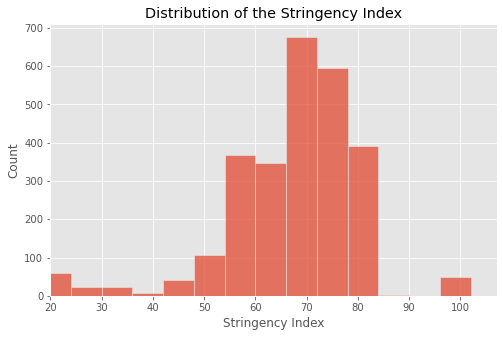

In [22]:
binsize = 6
bins = np.arange(0, df['STRINGENCY_INDEX'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
sb.histplot(data = df, x = 'STRINGENCY_INDEX', bins = bins, color=color)
plt.xlim(20)
plt.xlabel('Stringency Index')
plt.title("Distribution of the Stringency Index")
plt.show()

We have a large left skew, let's get a better picture by applying a logarithmic transformation to the data.

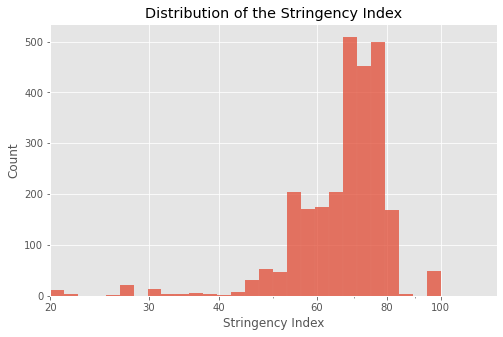

In [29]:
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['STRINGENCY_INDEX'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
sb.histplot(data = df, x = 'STRINGENCY_INDEX', bins = bins, color = color)
plt.xscale('log')
plt.xticks([20, 30, 40, 60, 80, 100], ['20','30','40','60','80','100'])
plt.xlim(20)
plt.xlabel('Stringency Index')
plt.title("Distribution of the Stringency Index")
plt.show()

## Total Deaths / Million over Time by Country

In the following graph, we're comparing the total deaths in a country for every million in population - this provides a better representation of deaths especially when comparing against countries with vastly different populations. 

We see that both the United States and Sweden, the two countries that have avoided implementing lockdowns are the worst affected with no hint of the curve flattening.

In contrast, India has done comparitively quite well in controlling the pandemic, despite having the second largest amount of deaths - the country has managed to mostly flatten the curve.

Australia and China are the best performers in controlling the pandemic.

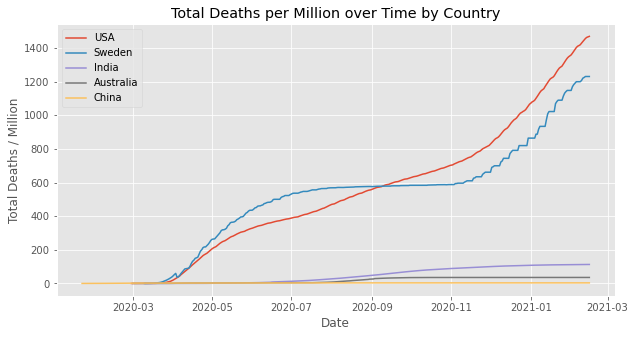

In [38]:
# Plot a combined time series chart showing the total deaths per million over time
legend_label = ['USA', 'Sweden', 'India', 'Australia', 'China']

plt.figure(figsize=(10,5))
plt.errorbar(data = usa_df, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.errorbar(data = sweden_df, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.errorbar(data = india_df, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.errorbar(data = australia_df, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.errorbar(data = china_df, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.xlabel("Date")
plt.ylabel("Total Deaths / Million")
plt.title("Total Deaths per Million over Time by Country")
plt.legend(labels = legend_label)
plt.show()

## Case Fatality Rates

The Case Fatality Rates (CFR) are calculated by dividing the number of deaths by the number of confirmed infections - this provides an indication of the severity of the virus. 

Comparisons have been made of the death rates of COVID-19 compared with the seasonal flu (the WHO estimates the latter to be around 0.1%).

The reality is however, as per the data, the death rates have been different in each country and has changed over time. Also not all countries conduct the same frequency of testing which affects the figures.

As per the data, the most recent COVID-19 related CFR for Australia is approximately 3% (35/1150), in the United States the CFR is around 1.75% (1400 / 80000). An interesting result! As per the data, you have a higher chance of having a COVID-19 fatality in Australia than compared with someone in the United States.

And in both cases, COVID-19 is deadlier than the seasonal flu.

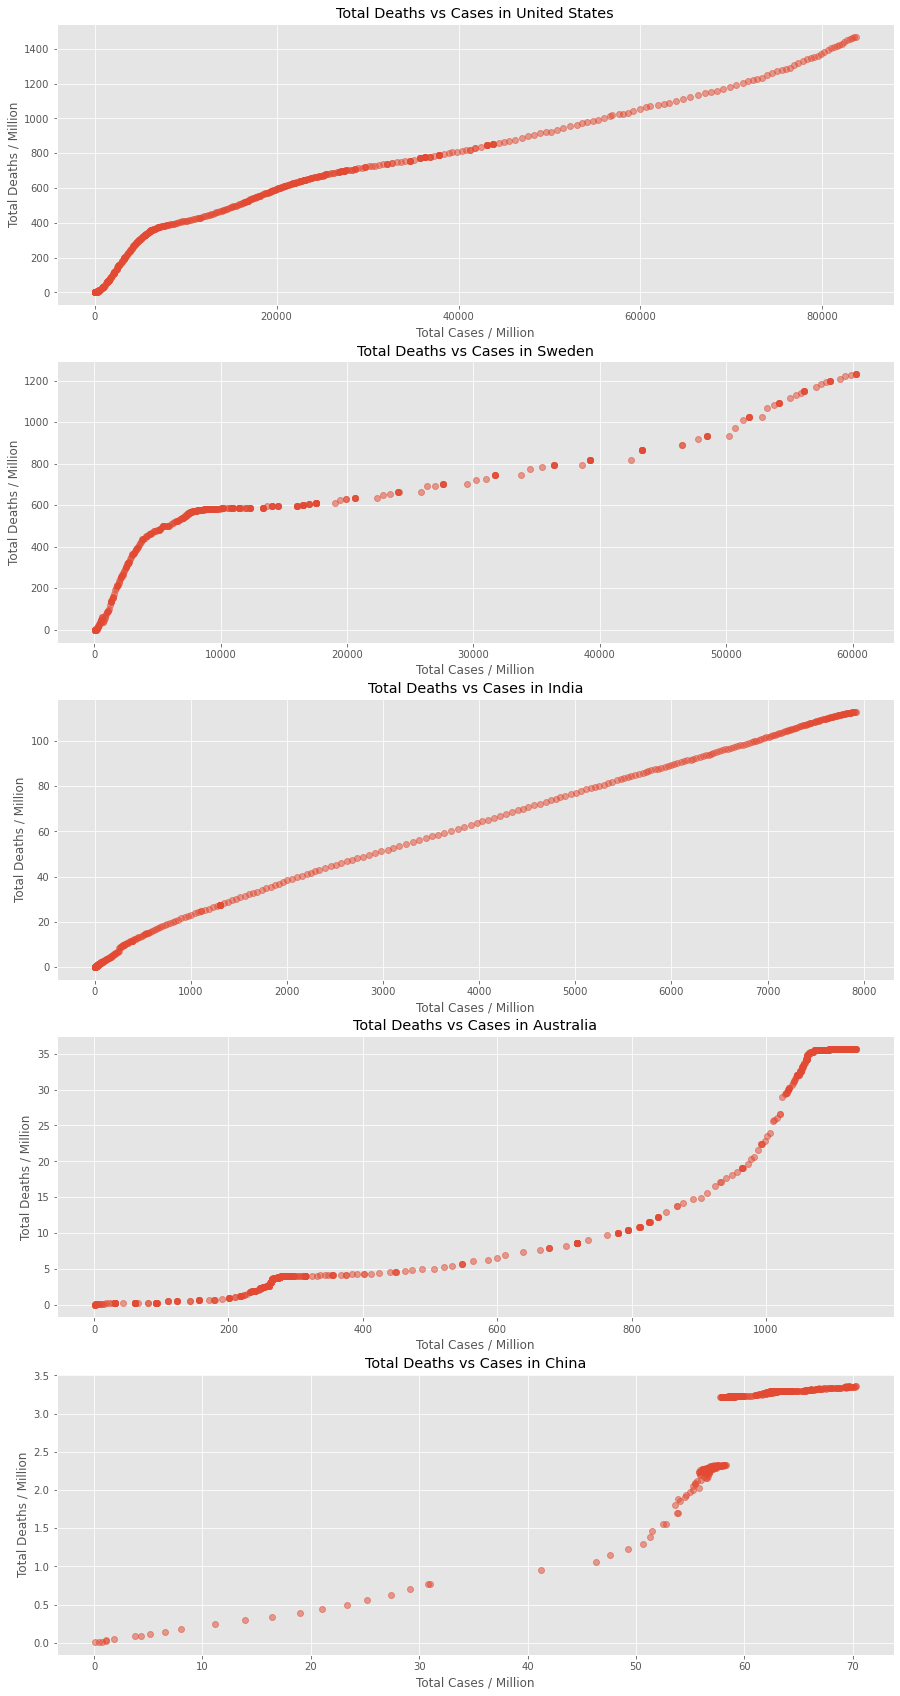

In [109]:
# Scatter plot showing positive correlations
country_df = [usa_df, sweden_df, india_df, australia_df, china_df]
country_label = ['United States', 'Sweden', 'India', 'Australia', 'China']
index = 0

fig, ax = plt.subplots(5,1)
fig.set_figheight(30)
fig.set_figwidth(15)

for country in country_df:
    sb.regplot(data = country, x = 'TOTAL_CASES_PER_MILLION', y='TOTAL_DEATHS_PER_MILLION', truncate = False, 
           x_jitter=0.5, scatter_kws={'alpha':0.5}, fit_reg=False, ax=ax[index])
    ax[index].set_xlabel("Total Cases / Million")
    ax[index].set_ylabel("Total Deaths / Million")
    ax[index].set_title(f"Total Deaths vs Cases in {country_label[index]}")
    index += 1

## Anti-Pandemic Measures Employed - USA & Sweden

Across the five countries under analysis, it can be noticed that they all have starkly different approaches to handling the pandemic.

Both USA and Sweden did not implement lockdown, their approach consisted primarily of economic measures and public health measures.

It can be argued that both countries are examples of how not to handle this pandemic.

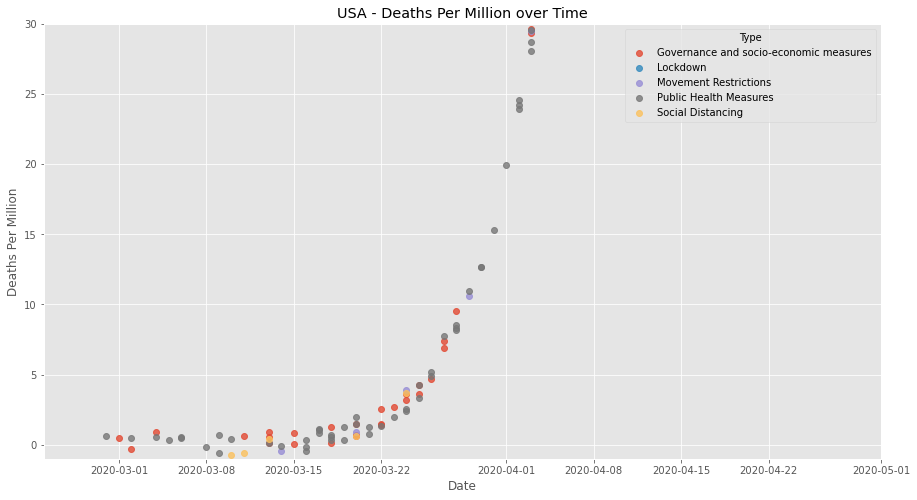

In [118]:
# USA
measure_markers = [['Governance and socio-economic measures', 'o'], ['Lockdown', '^'],
                  ['Movement restrictions', 's'], ['Public health measures', 's'], ['Social distancing', 'o']]
plt.figure(figsize=(15,8))
for measure, marker in measure_markers:
    df_cat = usa_df[usa_df['CATEGORY'] == measure].drop_duplicates()
    sb.regplot(data = df_cat, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION', fit_reg=False, y_jitter=0.9)
    
plt.legend(['Governance and socio-economic measures', 'Lockdown', 'Movement Restrictions', 
            'Public Health Measures', 'Social Distancing'], title = 'Type')
plt.ylabel("Deaths Per Million")
plt.xlabel("Date")
plt.title("USA - Deaths Per Million over Time")
plt.ylim(-1, 30)
plt.xlim(dt.date(2020, 2, 24), dt.date(2020, 5, 1));

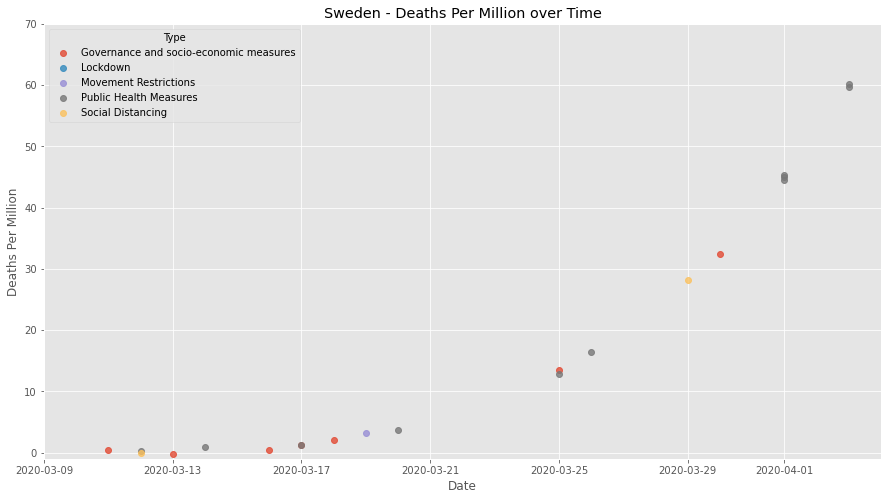

In [120]:
# Sweden
plt.figure(figsize=(15,8))
for measure, marker in measure_markers:
    df_cat = sweden_df[sweden_df['CATEGORY'] == measure].drop_duplicates()
    sb.regplot(data = df_cat, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION', fit_reg=False, y_jitter=0.5)
    
plt.legend(['Governance and socio-economic measures', 'Lockdown', 'Movement Restrictions', 
            'Public Health Measures', 'Social Distancing'], title = 'Type')
plt.ylabel("Deaths Per Million")
plt.xlabel("Date");
plt.title("Sweden - Deaths Per Million over Time")
plt.ylim(-1, 70)
plt.xlim(dt.date(2020, 3, 9), dt.date(2020, 4, 4));

## Anti-Pandemic Measures Employed - Australia, India & China

The last three countries under analysis have been successful in controlling the pandemic, their approaches have been different.
#### India
During the data period analyzed, India's approach relied on implementing more lockdowns than other countries under comparison, movement restrictions and public health measures such as health screenings and border crossings, awareness campaigns and strengthening the public health system.
#### Australia
During the data period analyzed, Australia's approach can be considered balanced. The government implemented all forms of measures. Australia placed a lot of emphasis on social distancing, economic stimulus (i.e. JobKeeper and JobSeeker programs) along with implementing lockdowns, this resulted in flattening the curve.
#### China
The government heavily implemented movement restrictions and public health measures. Social distancing was also enforced however due to the movement restrictions, this was in effect by default. The combination of these resulted in China quickly flattening the curve and maintaining it - as per the provided data by their government.

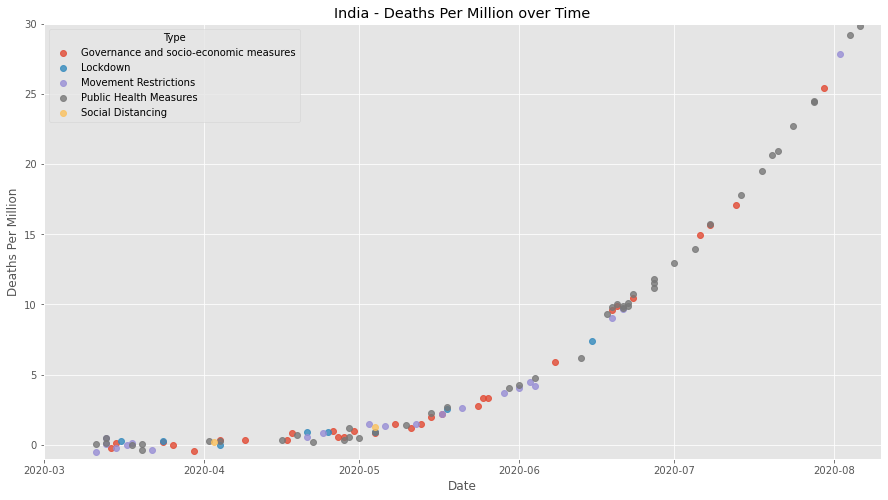

In [121]:
#India
plt.figure(figsize=(15,8))
for measure, marker in measure_markers:
    df_cat = india_df[india_df['CATEGORY'] == measure].drop_duplicates()
    sb.regplot(data = df_cat, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION', fit_reg=False, y_jitter=0.5)

plt.legend(['Governance and socio-economic measures', 'Lockdown', 'Movement Restrictions', 
            'Public Health Measures', 'Social Distancing'], title = 'Type')
plt.ylabel("Deaths Per Million")
plt.xlabel("Date");
plt.title("India - Deaths Per Million over Time")
plt.ylim(-1, 30)
plt.xlim(dt.date(2020, 3, 1), dt.date(2020, 8, 10));

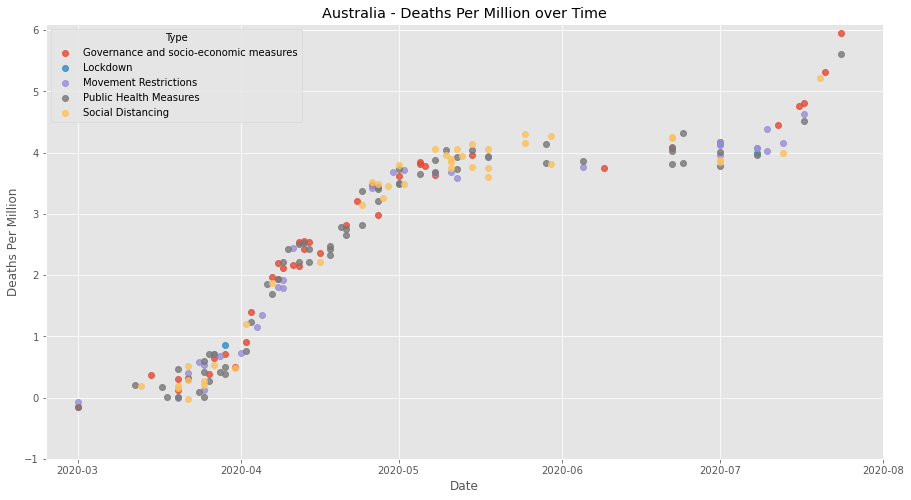

In [122]:
# Australia
plt.figure(figsize=(15,8))
for measure, marker in measure_markers:
    df_cat = australia_df[australia_df['CATEGORY'] == measure].drop_duplicates()
    sb.regplot(data = df_cat, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION', fit_reg=False, y_jitter=0.3)

plt.legend(['Governance and socio-economic measures', 'Lockdown', 'Movement Restrictions', 
            'Public Health Measures', 'Social Distancing'], title = 'Type')
plt.ylabel("Deaths Per Million")
plt.xlabel("Date");
plt.title("Australia - Deaths Per Million over Time")
plt.ylim(-1, 6.1)
plt.xlim(dt.date(2020, 2, 24), dt.date(2020, 8, 1));

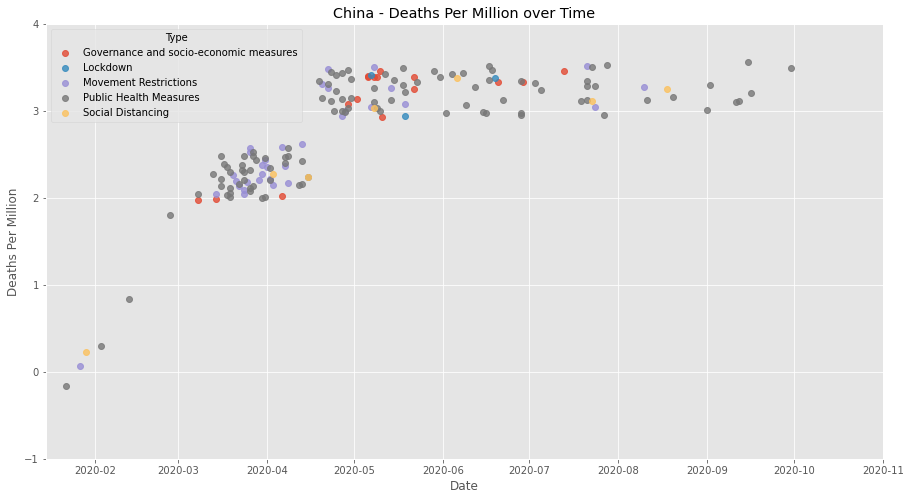

In [123]:
# China
plt.figure(figsize=(15,8))
for measure, marker in measure_markers:
    df_cat = china_df[china_df['CATEGORY'] == measure].drop_duplicates()
    sb.regplot(data = df_cat, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION', fit_reg=False, y_jitter=0.3)

plt.legend(['Governance and socio-economic measures', 'Lockdown', 'Movement Restrictions', 
            'Public Health Measures', 'Social Distancing'], title = 'Type')
plt.ylabel("Deaths Per Million")
plt.xlabel("Date");
plt.title("China - Deaths Per Million over Time")
plt.ylim(-1, 4)
plt.xlim(dt.date(2020, 1, 15), dt.date(2020, 11, 1));

## Conclusion

At the start of the analysis, it looked as if all the country's governments have been stringent in their approach to the pandemic, however upon further analysis of the available data - the countries who have successfully controlled the pandemic are India, Australia and China.

A common element between all three countries has been in implementing a combination of: lockdowns, movement restrictions and increased public health measures such as increased testing and health screenings.